<a href="https://colab.research.google.com/github/raxor555/Garbage-Detection-/blob/main/Garbage_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%capture
!pip install ultralytics
# !pip install albumentations

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
import torch
from PIL import Image
from IPython.display import display, Video
from ultralytics import YOLO
from collections import deque
import subprocess  # For executing ffmpeg

In [5]:
# Define dataset paths
train_dir = "/content/drive/MyDrive/garbage/dataset/images/Train"
val_dir = "/content/drive/MyDrive/garbage/dataset/images/val"

# Define class names
classes = ["garbage"]  # Add more classes if needed

# Create YAML content
data_yaml_content = f"""
train: {train_dir}
val: {val_dir}

nc: 1  # Number of classes
names: ['garbage']  # Class names
"""

# Save to a file
yaml_path = "/content/drive/MyDrive/garbage/dataset/dataset.yaml"
with open(yaml_path, "w") as f:
    f.write(data_yaml_content)

# Display the content for verification
!cat {yaml_path}


train: /content/drive/MyDrive/garbage/dataset/images/Train
val: /content/drive/MyDrive/garbage/dataset/images/val

nc: 1  # Number of classes
names: ['garbage']  # Class names


In [19]:
model = YOLO("yolo11n.pt")


In [7]:
results = model.train(
    data="/content/drive/MyDrive/garbage/dataset/dataset.yaml",
    epochs=50,
    imgsz=640,
    lr0= 0.0005,
    batch=32,
    lrf=0.1,
    augment=True
)

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/garbage/dataset/dataset.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

train: Scanning /content/drive/MyDrive/garbage/dataset/labels/Train... 972 images, 31 backgrounds, 1 corrupt: 100%|██████████| 974/974 [06:41<00:00,  2.43it/s]

train: WARNING ⚠️ /content/drive/MyDrive/garbage/dataset/images/Train/55932ba8-plastic231.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3155]


train: New cache created: /content/drive/MyDrive/garbage/dataset/labels/Train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/garbage/dataset/labels/val... 241 images, 3 backgrounds, 0 corrupt: 100%|██████████| 241/241 [01:39<00:00,  2.42it/s]

val: New cache created: /content/drive/MyDrive/garbage/dataset/labels/val.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.74G      1.073      2.115      1.596         36        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.08s/it]

                   all        241        240      0.834      0.147      0.632      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.02G      1.023       1.22      1.523         26        640: 100%|██████████| 31/31 [00:20<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]

                   all        241        240      0.583      0.599      0.521      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.03G      1.043      1.048       1.52         34        640: 100%|██████████| 31/31 [00:18<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]

                   all        241        240      0.777      0.724       0.76      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.05G      1.056     0.9499      1.519         42        640: 100%|██████████| 31/31 [00:18<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        241        240      0.607      0.722      0.657      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.05G      1.035     0.8559      1.501         43        640: 100%|██████████| 31/31 [00:19<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        241        240      0.552      0.713      0.605      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.08G       1.03     0.7911      1.514         32        640: 100%|██████████| 31/31 [00:18<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]

                   all        241        240      0.595      0.636      0.547      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.08G      1.028      0.742      1.497         39        640: 100%|██████████| 31/31 [00:18<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        241        240      0.864      0.794      0.859      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.11G      1.029     0.7276      1.476         31        640: 100%|██████████| 31/31 [00:20<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        241        240      0.824      0.778      0.814      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.11G     0.9816     0.6806      1.447         33        640: 100%|██████████| 31/31 [00:18<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]

                   all        241        240      0.652      0.764        0.6      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.13G     0.9527     0.6654      1.435         32        640: 100%|██████████| 31/31 [00:18<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        241        240       0.89      0.892      0.908      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.14G     0.9147     0.6236      1.405         34        640: 100%|██████████| 31/31 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        241        240      0.768      0.792      0.641      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.16G     0.9782     0.6442      1.438         37        640: 100%|██████████| 31/31 [00:18<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        241        240      0.867      0.867       0.87      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.17G     0.9243     0.6007       1.41         38        640: 100%|██████████| 31/31 [00:18<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        241        240      0.939      0.966      0.956      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.19G     0.8973     0.5805      1.394         33        640: 100%|██████████| 31/31 [00:18<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        241        240      0.857      0.917       0.91      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       5.2G     0.9161     0.5993      1.405         36        640: 100%|██████████| 31/31 [00:18<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        241        240      0.788      0.796      0.698      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.22G     0.8892     0.5792      1.372         38        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        241        240       0.95      0.912      0.955      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.23G      0.889      0.574      1.368         38        640: 100%|██████████| 31/31 [00:18<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]

                   all        241        240      0.757      0.808        0.8      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.25G     0.8901     0.5384      1.388         40        640: 100%|██████████| 31/31 [00:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        241        240      0.943      0.958      0.967      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.26G     0.8771     0.5401       1.37         36        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        241        240      0.878      0.896      0.944      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.28G     0.8926     0.5658      1.371         40        640: 100%|██████████| 31/31 [00:18<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]

                   all        241        240      0.942      0.953      0.968      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.29G     0.8844     0.5457      1.373         36        640: 100%|██████████| 31/31 [00:18<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        241        240      0.845       0.95      0.943      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.31G     0.8702     0.5507      1.379         31        640: 100%|██████████| 31/31 [00:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        241        240      0.969      0.971      0.972      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.32G      0.841     0.5101      1.347         34        640: 100%|██████████| 31/31 [00:17<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]

                   all        241        240       0.94      0.909      0.953      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.34G     0.8416     0.4986      1.344         40        640: 100%|██████████| 31/31 [00:18<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        241        240      0.916      0.979      0.964      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.35G     0.8465     0.5276      1.349         41        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        241        240      0.882       0.95      0.944      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.37G     0.8426     0.5247      1.337         43        640: 100%|██████████| 31/31 [00:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]

                   all        241        240      0.883      0.887      0.924      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.38G     0.8443     0.5156      1.348         31        640: 100%|██████████| 31/31 [00:18<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        241        240      0.954      0.971      0.967      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       5.4G     0.8447     0.5144      1.336         37        640: 100%|██████████| 31/31 [00:18<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        241        240      0.961      0.975      0.972      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.41G     0.8298     0.4955      1.326         40        640: 100%|██████████| 31/31 [00:18<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        241        240      0.963      0.986      0.974      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.43G       0.83     0.5098      1.335         37        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        241        240      0.971      0.979      0.975      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.44G      0.826     0.5039      1.335         38        640: 100%|██████████| 31/31 [00:18<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]

                   all        241        240        0.9      0.963      0.958      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.46G     0.8036     0.4973      1.321         34        640: 100%|██████████| 31/31 [00:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        241        240      0.955      0.975      0.962      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.46G     0.8127     0.4873      1.316         35        640: 100%|██████████| 31/31 [00:19<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        241        240      0.975      0.979      0.974       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.49G     0.8066     0.4778      1.307         34        640: 100%|██████████| 31/31 [00:18<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]

                   all        241        240      0.959      0.971      0.968      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       5.5G     0.8185     0.4758      1.332         35        640: 100%|██████████| 31/31 [00:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        241        240      0.959      0.973      0.968      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.52G     0.8105     0.4832      1.314         30        640: 100%|██████████| 31/31 [00:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        241        240      0.967      0.982      0.976      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.53G     0.8074     0.4838      1.311         34        640: 100%|██████████| 31/31 [00:18<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]

                   all        241        240      0.978      0.988      0.974      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.55G     0.8099     0.4855       1.32         33        640: 100%|██████████| 31/31 [00:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        241        240      0.975      0.985      0.972      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.55G     0.8021     0.4744       1.31         42        640: 100%|██████████| 31/31 [00:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        241        240       0.96      0.967      0.968      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.58G     0.7605     0.4696        1.3         32        640: 100%|██████████| 31/31 [00:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        241        240      0.956      0.971      0.974      0.757


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.59G     0.7597     0.4582      1.444         13        640: 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        241        240      0.975      0.981       0.97      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.61G     0.7372     0.3806      1.418         13        640: 100%|██████████| 31/31 [00:18<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        241        240      0.967      0.979      0.969      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.62G     0.7286     0.3532      1.422         13        640: 100%|██████████| 31/31 [00:17<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]

                   all        241        240      0.974      0.983       0.97      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.64G     0.7131     0.3525      1.385         13        640: 100%|██████████| 31/31 [00:17<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        241        240      0.811      0.938      0.923      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.64G     0.7094     0.3448        1.4         12        640: 100%|██████████| 31/31 [00:18<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        241        240       0.97      0.988      0.975      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.67G     0.7126     0.3462      1.393         13        640: 100%|██████████| 31/31 [00:17<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        241        240      0.971      0.987      0.972      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.67G     0.7017     0.3485      1.373         11        640: 100%|██████████| 31/31 [00:18<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        241        240      0.974      0.979      0.972       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       5.7G     0.6942      0.339       1.39         13        640: 100%|██████████| 31/31 [00:17<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]

                   all        241        240      0.967      0.988      0.972      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.71G     0.6741     0.3381       1.34         11        640: 100%|██████████| 31/31 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        241        240      0.975      0.983      0.972      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.73G     0.6791     0.3293      1.355         12        640: 100%|██████████| 31/31 [00:17<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]

                   all        241        240      0.973      0.979      0.969      0.765



50 epochs completed in 0.324 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.25s/it]


                   all        241        240      0.975      0.987      0.975      0.796
Speed: 0.2ms preprocess, 9.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train2


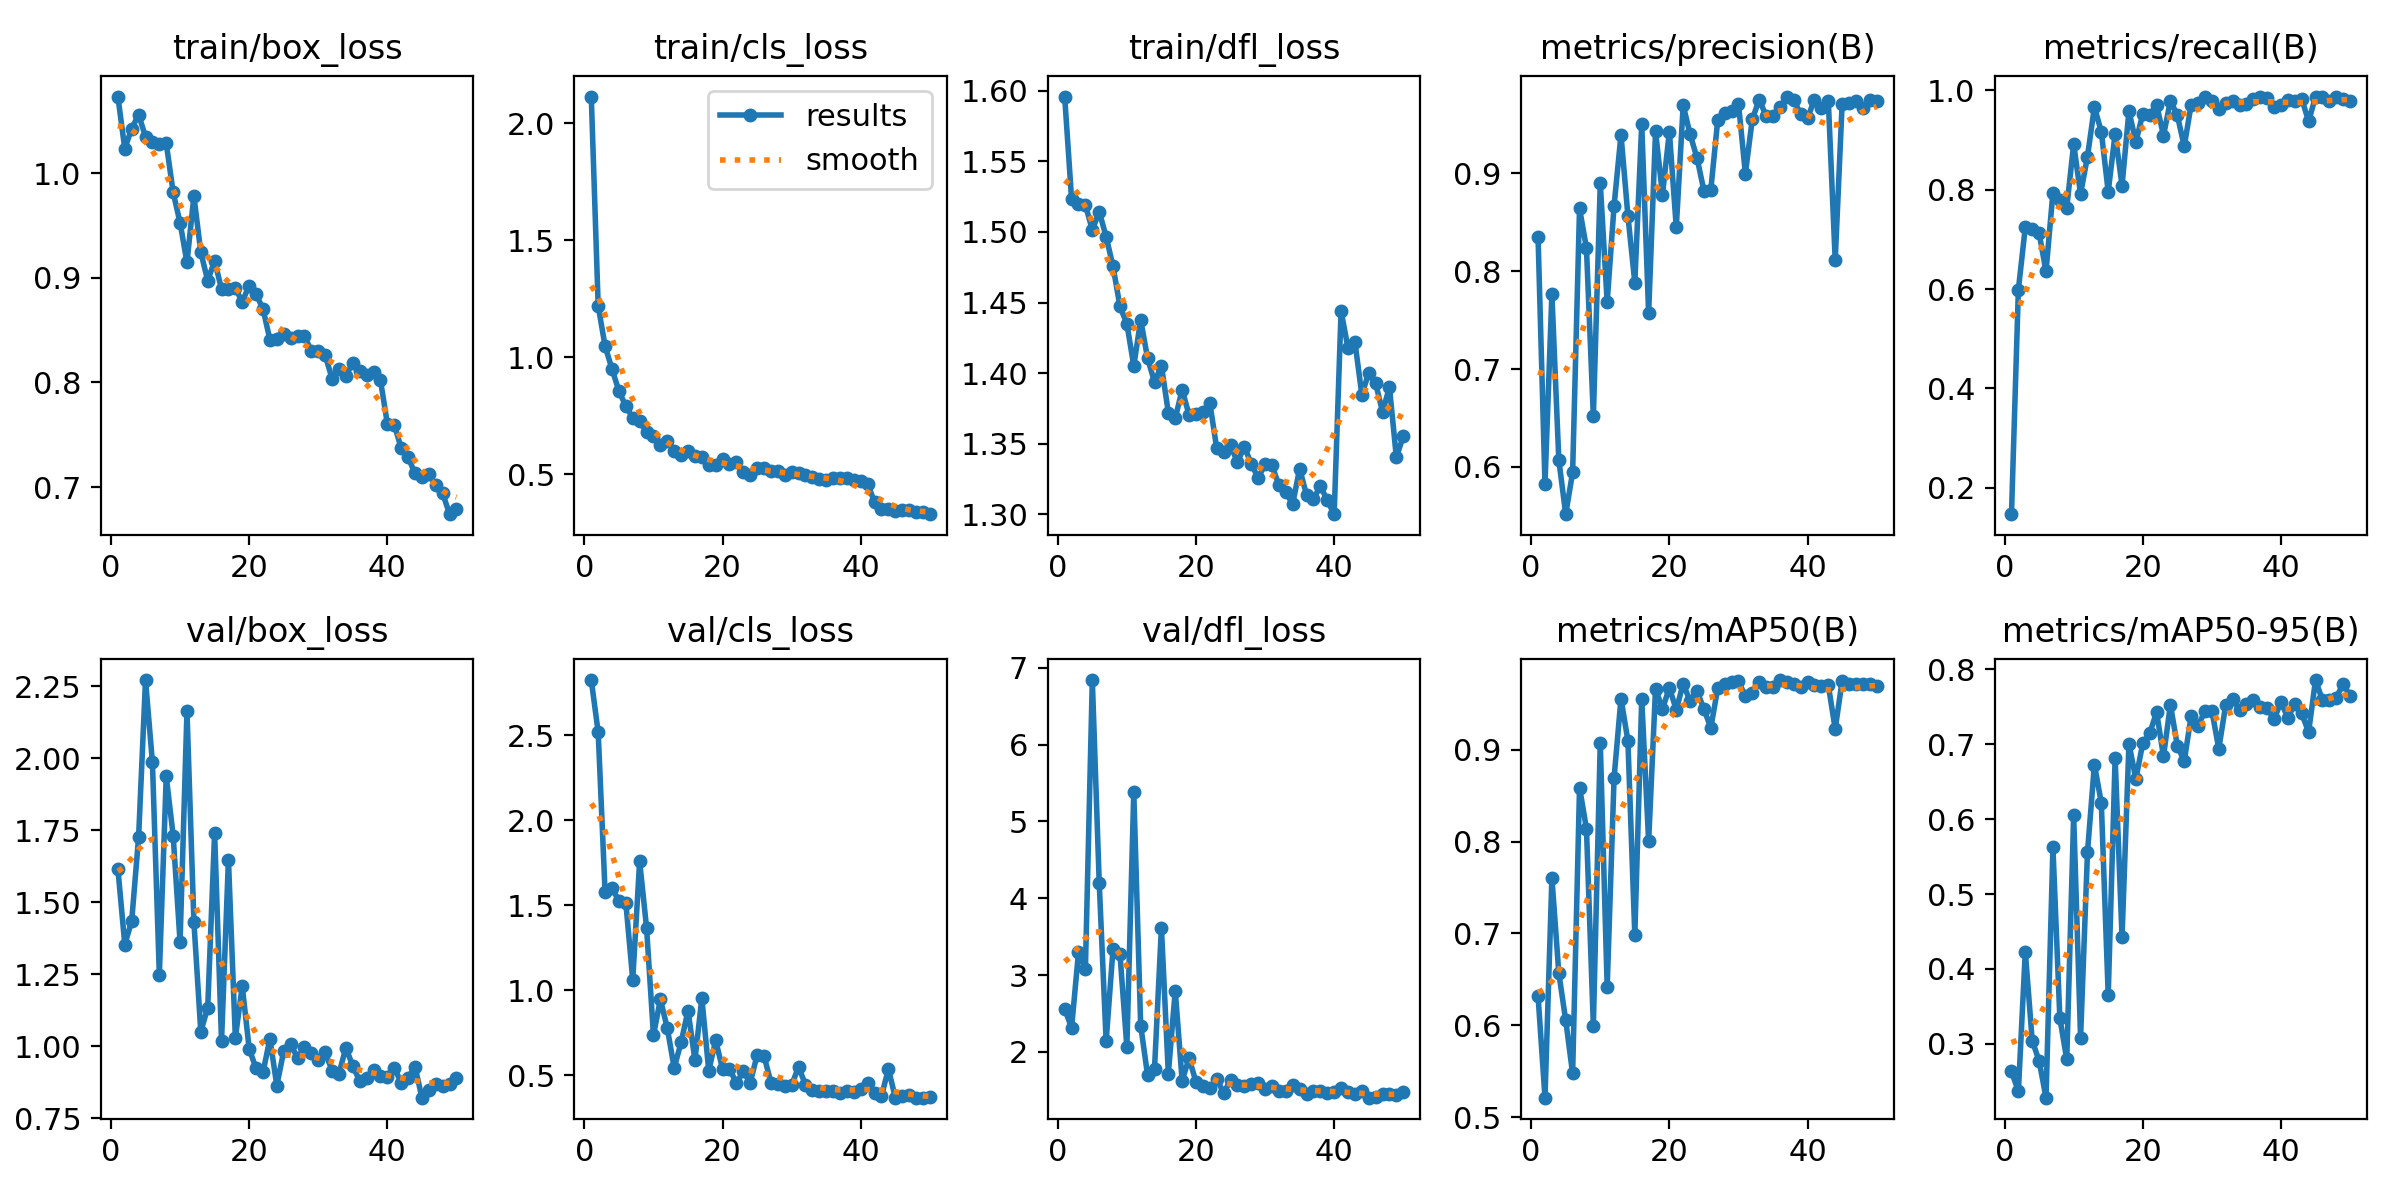

In [8]:
train_results = "/content/runs/detect/train2/results.png"

if os.path.exists(train_results):
    img = Image.open(train_results)  # Use PIL to read the image
    display(img)  # Display the image
else:
    print("Training results image not found.")

In [9]:
import pandas as pd

# Load training logs from the results.csv file
df = pd.read_csv("/content/runs/detect/train2/results.csv")

# Now your plotting code will work

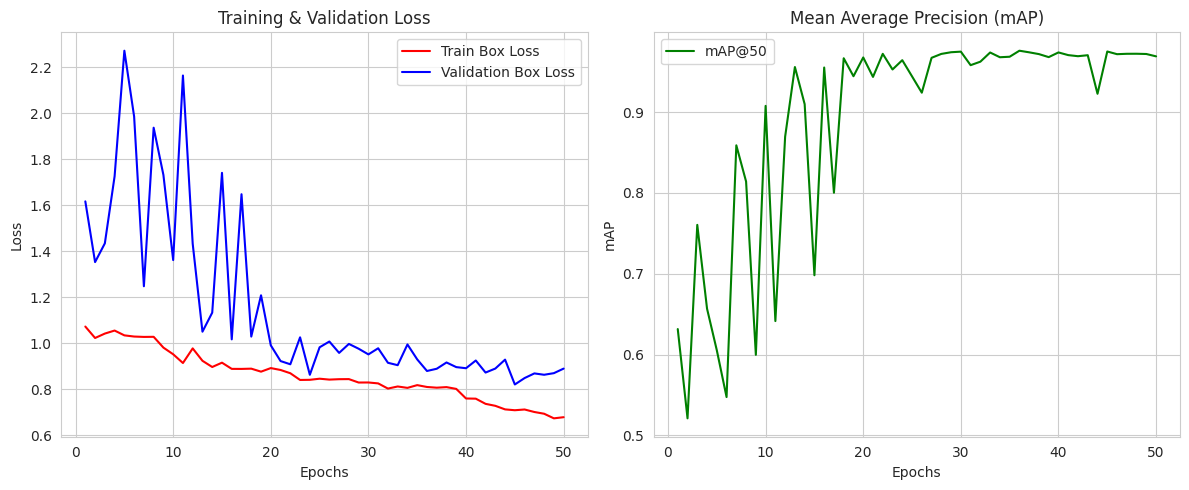

In [10]:
map_column = "metrics/mAP50(B)"
loss_column_train = "train/box_loss"
loss_column_val = "val/box_loss"

plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")

# 📌 Plot Train Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(df["epoch"], df[loss_column_train], label="Train Box Loss", color="red")
plt.plot(df["epoch"], df[loss_column_val], label="Validation Box Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

# 📌 Plot mAP@50
plt.subplot(1, 2, 2)
plt.plot(df["epoch"], df[map_column], label="mAP@50", color="green")
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title("Mean Average Precision (mAP)")
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
import glob
import random
import cv2
import os
import matplotlib.pyplot as plt



image 1/1 /content/drive/MyDrive/garbage/dataset/images/Train/49bee358-paper267.jpg: 480x640 1 garbage, 34.9ms
Speed: 2.3ms preprocess, 34.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/garbage/dataset/images/Train/e4e6a345-paper361.jpg: 480x640 1 garbage, 32.5ms
Speed: 2.1ms preprocess, 32.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/garbage/dataset/images/Train/d00de516-paper52.jpg: 480x640 1 garbage, 29.7ms
Speed: 2.0ms preprocess, 29.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/garbage/dataset/images/Train/a5608974-paper316.jpg: 480x640 1 garbage, 95.0ms
Speed: 5.7ms preprocess, 95.0ms inference, 7.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/garbage/dataset/images/Train/e4639b36-plastic373.jpg: 480x640 1 garbage, 57.1ms
Speed: 3.4ms preprocess, 57.1ms inference, 2.1ms po

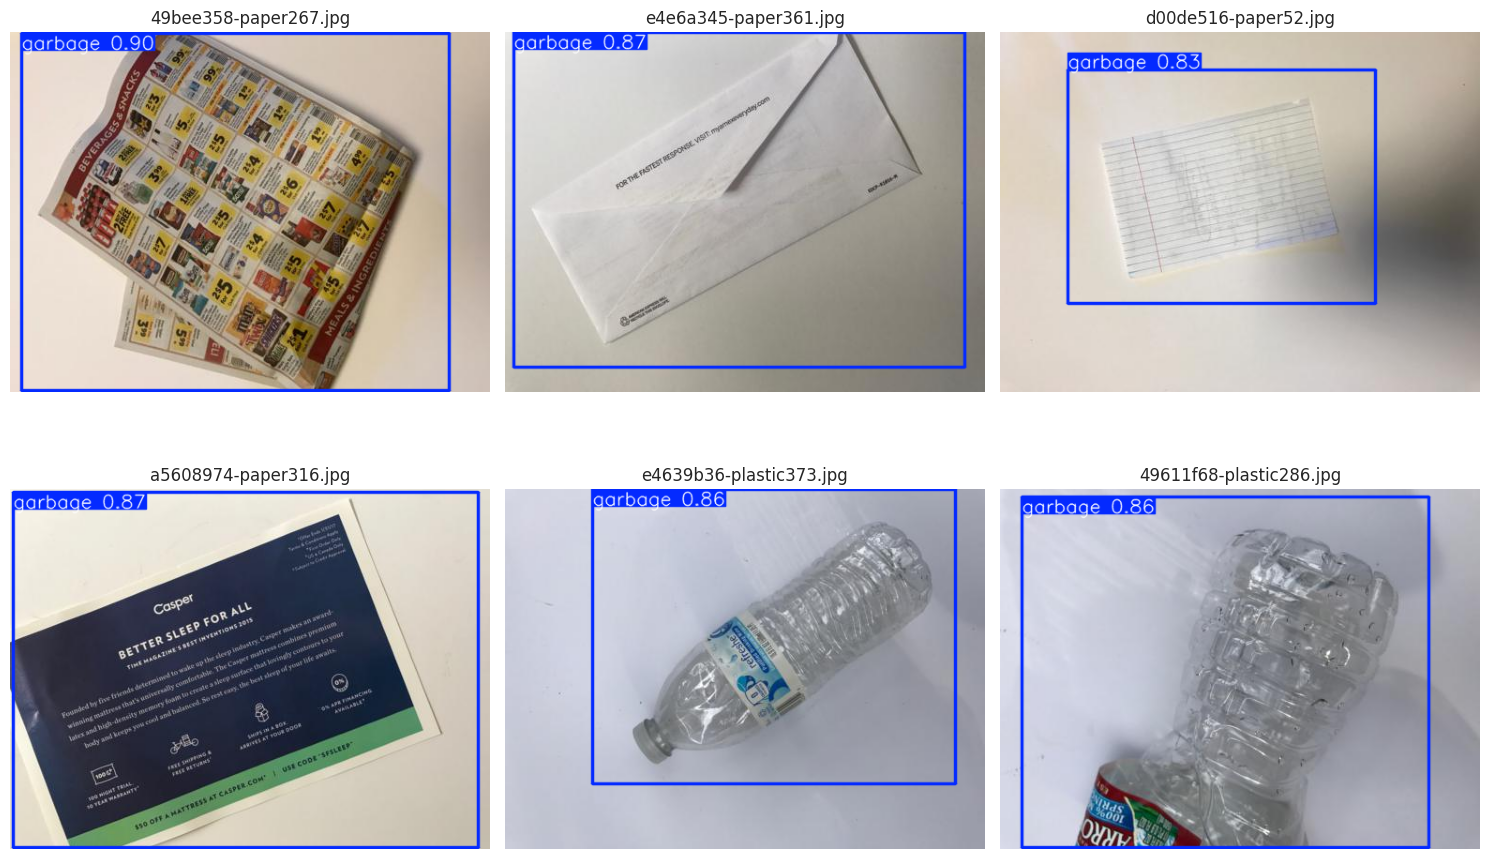

In [14]:
# Collect all images from the directory
all_images = glob.glob("/content/drive/MyDrive/garbage/dataset/images/Train/*.jpg")

num_images = min(6, len(all_images))  # Take the smaller of 6 or total images

# If no images are found, print a message and stop execution
if num_images == 0:
    print("No images found in the directory!")
else:
    # Randomly select images
    test_images = random.sample(all_images, num_images)

    # Create a figure with 2 rows and 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    for img_path, ax in zip(test_images, axes.flatten()):
        results = model(img_path)      # Run YOLO on the image
        result_img = results[0].plot() # Get the annotated image

        # Convert the annotated image to RGB for plotting
        img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.axis("off")
        ax.set_title(os.path.basename(img_path))  # Show the image filename

    plt.tight_layout()
    plt.show()

In [21]:
# Load the trained YOLOv8 model
model_path = "/content/runs/detect/train2/weights/best.pt"
model = YOLO(model_path)

# Define input and output video paths
input_video = "/content/4855724-hd_1920_1080_25fps.mp4"
output_video = "/content/runs/output video/output_video.mp4"
compressed_video = "/content/runs/output_video/output_video_compressed.mp4"  # Compressed version

# Open the input video file
cap = cv2.VideoCapture(input_video)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

# Process video frame by frame
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 on the frame
    results = model(frame, verbose=False)  # No extra logs

    # Draw bounding boxes
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0].item()
            label = f"Plate {conf:.2f}"

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write frame to output video
    out.write(frame)
    frame_count += 1

# Release video resources
cap.release()
out.release()
cv2.destroyAllWindows()
print(f"✅ Detection completed! Processed {frame_count} frames.")

# ✅ **Compress the video using FFmpeg**
print("⏳ Compressing video... (This may take a few seconds)")
ffmpeg_command = [
    "ffmpeg", "-i", output_video, "-vcodec", "libx264", "-crf", "28", "-preset", "fast", compressed_video
]
subprocess.run(ffmpeg_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print("✅ Compression done!")

# Function to display video in Jupyter Notebook (Kaggle Compatible)
from IPython.display import HTML
from base64 import b64encode

def play_video(file_path, width=800):
    """Display a video file directly in a Jupyter Notebook (Kaggle compatible)."""
    try:
        with open(file_path, "rb") as video_file:
            video_data = video_file.read()
            video_base64 = b64encode(video_data).decode()
    except FileNotFoundError:
        return HTML("🚨 Error: Video file not found!")

    video_html = f"""

    """

    return HTML(video_html)

# Display the compressed video
play_video(compressed_video, width=1000)

✅ Detection completed! Processed 268 frames.
⏳ Compressing video... (This may take a few seconds)
✅ Compression done!
